In [12]:
%pylab inline
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Aplicación Random Forest.

## 1. Dataset.
En esta ocación trabajaremos en la clasificación de dígitos para el dataset *load_digits*.

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

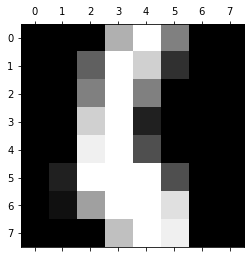

In [3]:
plt.gray()
plt.matshow(digits.images[95])
plt.show()

## 2. División del dataset.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

## 3. Modelo *Random Forest Classifier*.

In [7]:
rfclf = RandomForestClassifier(n_estimators=20, bootstrap=True)
rfclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [8]:
print("Evaluación del modelo.")
print("Score train: {}\nScore test: {}".format(rfclf.score(X_train, y_train), rfclf.score(X_test, y_test)))

Evaluación del modelo.
Score train: 1.0
Score test: 0.9694444444444444


El entreamiento del modelo es exitoso, alcazando casi un $97\%$ de puntuación para el conjunto de prueba, un valor muy próximo al obtenido en la putuación del conjunto de entrenamiento.

#### Matriz de cofusión.

In [17]:
y_pred_test = rfclf.predict(X_test)
confm = confusion_matrix(y_test, y_pred_test)
confm = confm.astype('float') / confm.sum(axis=1)[:, np.newaxis]*100

<AxesSubplot:>

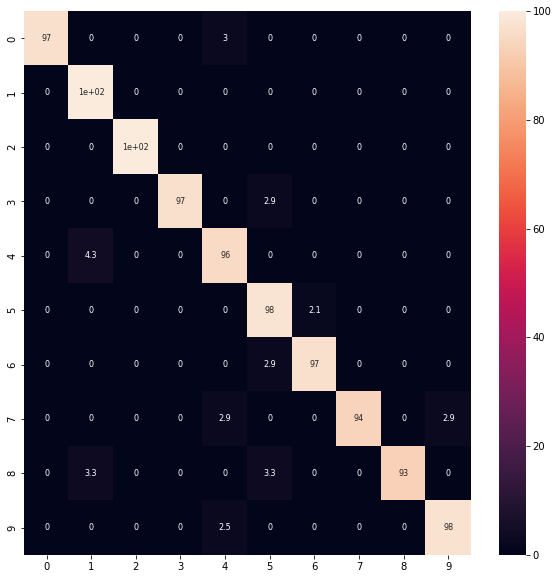

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(confm, annot=True, annot_kws={"size": 8}, ax=ax)

La matriz de cofusión confirma los resultados anteriores, el modelo realmente tiene pocas fallas a la hora de clasificar, pues los valores fuera de la diagonal de la matriz no superan individualmente el $4.5\%$.

#### Classification report.
Y esto está soportado por el reporte de clasificación.

In [22]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.94      0.96      0.95        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.94      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Que el *f1-score* sea bastate estable indica un balance entre la precisión y el *recall*, por lo que el modelo es suficientemente cuidadoso etiquetando de manera correcta los que pertenecen a una clase sin perder de vista a otros candidatos.

## 4. Optimización.

In [23]:
param_grid = [{'n_estimators': [1, int(1e1), int(1e2), int(1e3)], 'max_features': [3, 6, 7], 'bootstrap': [False, True]}, 
    {'bootstrap': [False, True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

In [24]:
forest_clf = RandomForestClassifier() 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True) 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False, True], 'max_features': [3, 6, 7],
                          'n_estimators': [1, 10, 100, 1000]},
                         {'bootstrap': [False, True], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
#Parámetros de optimización hallados.
grid_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 1000}

In [26]:
opclf = RandomForestClassifier(**grid_search.best_params_)
opclf.fit(X_train, y_train)
opclf.score(X_train, y_train)
print("Evaluación del modelo con optimización.")
print("Score train: {}\nScore test: {}".format(opclf.score(X_train, y_train), opclf.score(X_test, y_test)))

Evaluación del modelo con optimización.
Score train: 1.0
Score test: 0.975


En efecto, la optimización de los hiperparámetros ha mejorado el desempeño del modelo.